Im Rahmen des Moduls "Maschinelles Lernen" wurde dieses Juypter Notebook von Lisa Tawackoli und Ruslan Adilgereev entwickelt. Es nutzt den Datensatz "wbdc_5.csv", welcher Daten aus der Bildanalyse von Feinnadelbiopsien bei Brusttumoren enthält. Das Ziel dieses Programmentwurfes ist es, ein präzises Modell zur Klassifizierung von Brusttumoren in die Kategorien gutartig (benigne) und bösartig (maligne) zu entwickeln.

Um dieses Ziel zu erreichen, werden verschiedene Machine-Learning Algorithmen eingesetzt, und in Bezug auf ihre Effektivität verglichen. Zu den Algorithmen gehören das Multilayer Perceptron (MLP), der Entscheidungsbaum (Decisiontree) und die Support Vector Machine (SVM). Es gilt, die Lernergebnisse bezüglich der diskutierten Qualitätskriterien zu bewerten und die Modelle, sowie verschiedene Konfigurationen dieser, zur Optimierung des Ergebnisses vorzunehmen.

**1. Datenvorbereitung und -untersuchung**

In [135]:
#Importieren der notwendigen Bibliotheken
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import name

Für die Verwendung der Algorithmen müssen die Daten in einem ersten Schritt entsprechend vorbereitet werden. Um zu wissen, welche Anpassungen in diesem Kontext vorgenommen werden müssen, wird sich zunächst ein Überblick über die Struktur des Datensatzes verschafft.

In [136]:
#Laden des Datensatzes und die Ausgabe der ersten fünf Zeilen (Kopf) dessen
data = pd.read_csv('wbdc_5.csv')  
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,compactness1,concavity1,concave_points1,symmetry1,...,fractal_dimension2,radius3,texture3,perimeter3,area3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,897374,B,12.30,19.02,77.88,464.4,0.04202,0.007756,0.008535,0.1539,...,0.002222,13.35,28.46,84.53,544.3,0.09052,0.03619,0.03983,0.2554,0.07207
1,8910251,B,10.60,18.95,69.28,346.4,0.11470,0.063870,0.026420,0.1922,...,0.003318,11.88,22.94,78.28,424.8,0.25150,0.19160,0.07926,0.2940,0.07587
2,854941,B,13.03,18.42,82.61,523.8,0.03766,0.025620,0.029230,0.1467,...,0.001777,13.30,22.81,84.46,545.9,0.04619,0.04833,0.05013,0.1987,0.06169
3,89869,B,14.76,14.74,94.87,668.7,0.07780,0.046080,0.035280,0.1521,...,0.002783,17.27,17.93,114.20,880.8,0.20090,0.21510,0.12510,0.3109,0.08187
4,9113538,M,17.60,23.33,119.00,980.5,0.20040,0.213600,0.100200,0.1696,...,0.011300,21.57,28.87,143.60,1437.0,0.47850,0.51650,0.19960,0.2301,0.12240


Der Einblick in den Kopf des Datensatzes verrät, dass er sich aus 29 Spalten zusammensetzt. Diese bestehen auf den ersten Blick, mit Ausnahme der ersten beiden Spalten "ID" und "Diagnosis", aus numerischen Daten. Da Machine Learning Algorithmen numerische Daten benötigen, müssen kategorische Daten wie die, der beiden ersten Spalten, in solche umgewandelt werden. Um uns darüber zu vergewissern, dass diese Spalten die einzigen kategorischen darstellen, lassen wir daher im Folgenden diese Information für alle Spalten ausgeben.

In [137]:
#Zusammenfassende Information über das DataFrame
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  501 non-null    int64  
 1   Diagnosis           501 non-null    object 
 2   radius1             501 non-null    float64
 3   texture1            501 non-null    float64
 4   perimeter1          501 non-null    float64
 5   area1               501 non-null    float64
 6   compactness1        501 non-null    float64
 7   concavity1          501 non-null    float64
 8   concave_points1     501 non-null    float64
 9   symmetry1           501 non-null    float64
 10  fractal_dimension1  501 non-null    float64
 11  radius2             501 non-null    float64
 12  texture2            501 non-null    float64
 13  perimeter2          501 non-null    float64
 14  area2               501 non-null    float64
 15  compactness2        501 non-null    float64
 16  concavit

Der Gesamtüberblick vergewissert uns in der Annahme, dass neben den beiden Spalten keine weiteren kategorischen Daten enthalten sind. Da die Spalte "ID" keine prädikative Information enthält, kann diese aus dem Datensatz entfernt werden.

In [138]:
#Entfernen der ID Spalte, da keine prädikative Information
data.drop('ID', axis=1, inplace=True) 

Nach dem Entfernen der Spalte "ID" bleibt als Spalte kategorischer Art die "Diagnose" übrig. Sie stellt die vorherzusagende Information dar. Um kategorische Daten zu numerischen Daten umzuwandeln, wird das Label-Encoding angewandr. Diese Methode bietet sich insbesondere dadurch an, dass es nur zwei zu codierende Kategorien gibt ("B" und "M"), welche sich über 0 und 1 numerisch intuitiv darstellen lassen. Gegen die Alternative, das One-Hot Encoding, spricht, dass zwei separate Spalten und damit Redundanz erzeugt würden.

In [139]:
#Codieren der Diagnose mittels Label Encoding
data["Diagnosis"] = data["Diagnosis"].map({"B": 0, "M":1})

Da fehlende Daten im Datensatz die Modellgenauigkeit reduzieren, zu Verzerrungen führen und die Komplexität der Datenverarbeitung erhöhen können, müssen auch diese identifiziert und anschließend mithilfe geeigneter Methoden wie Imputation angepasst oder aus dem Datensatz entfernt werden (sofern der Anteil nicht zu groß ist). 

In [97]:
#Ausgabe der Anzahl von Duplikaten und NaN Werten
duplicate_count = data.duplicated().sum()
print("Nas:", data.isna().sum().sum())
print("Duplikate:", duplicate_count)

Nas: 0
Duplikate: 0


Da der Datensatz weder Duplikate noch fehlende Werte enthält. muss hier keine Anpassung vorgenommen werden.

Eine Visualisierung der Daten über Histogramme ermöglicht es, die Verteilungen der Features zu untersuchen und zu sehen, wie diese sich je nach Diagnose (gutartig vs. bösartig) unterscheiden.

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

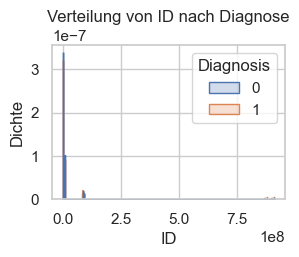

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

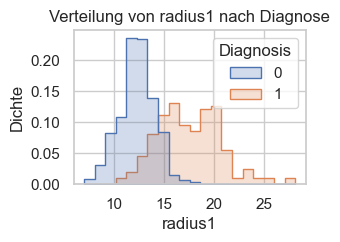

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

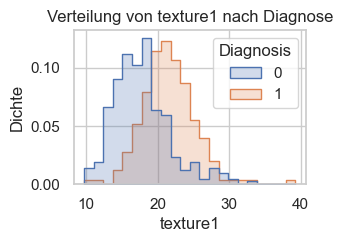

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

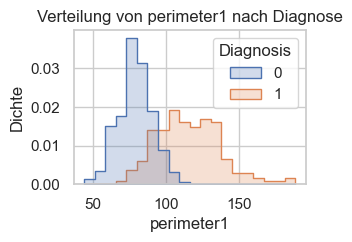

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

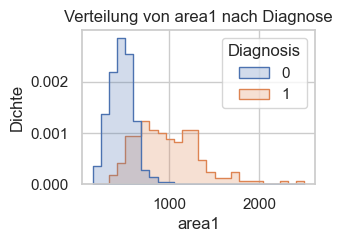

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

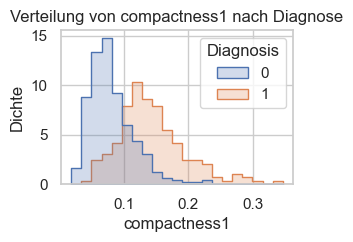

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

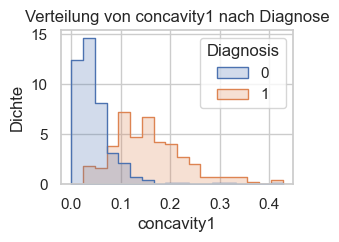

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

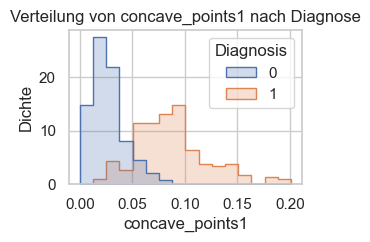

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

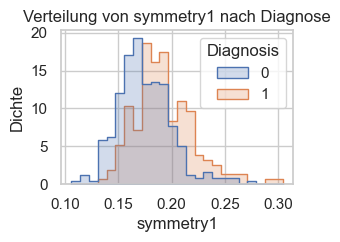

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

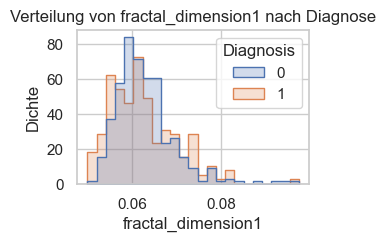

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

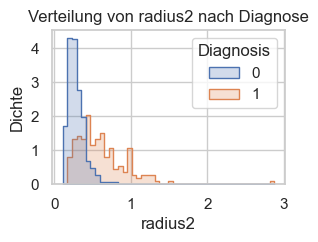

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

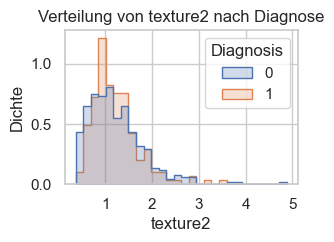

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

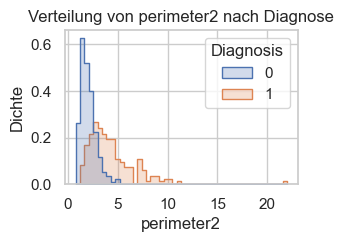

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

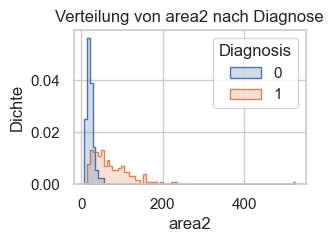

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

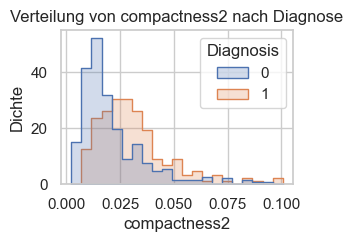

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

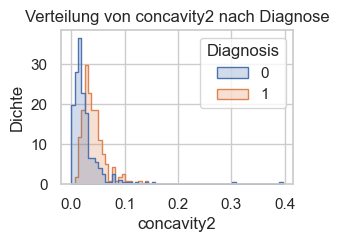

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

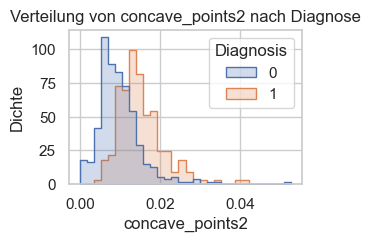

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

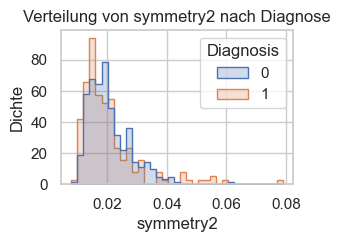

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

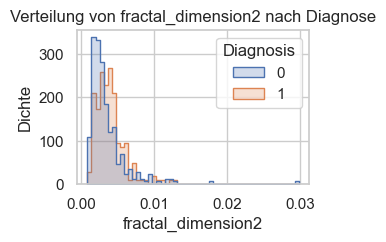

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

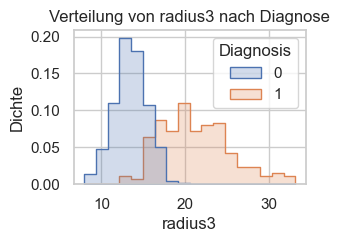

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

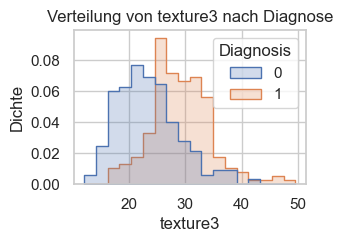

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

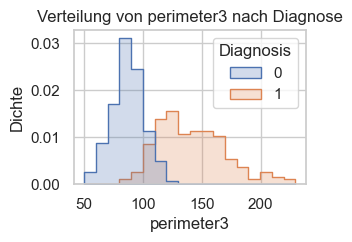

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

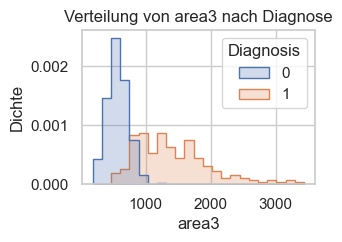

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

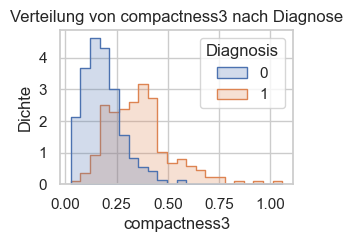

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

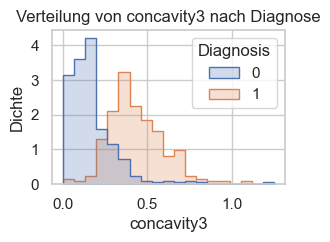

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

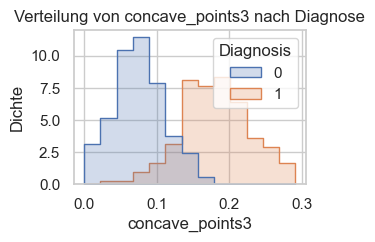

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

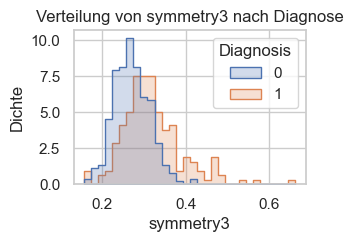

C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\seaborn\_oldcore.

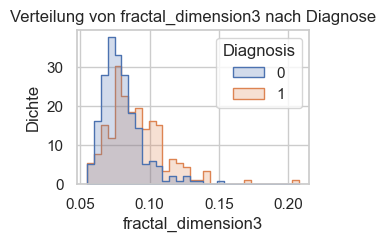

In [108]:
# Erstellen eines Histogramms für jedes Feature nach Diagnose
sns.set(style="whitegrid")
features = data.columns.drop('Diagnosis')
for feature in features:
    plt.figure(figsize=(3, 2))
    sns.histplot(data=data, x=feature, hue="Diagnosis", element="step", stat="density", common_norm=False)
    plt.title(f'Verteilung von {feature} nach Diagnose')
    plt.xlabel(feature)
    plt.ylabel('Dichte')
    plt.show()

*Hier eventuell noch ein paar Worte dazu, was man dem entnehmen kann oder durch andere Visualisierungen ersetzen?*

**Train-/ Test-Split**

Das Aufteilen der Daten in Trainings- und Testsets dient dazu, das  Modell mit einem Datensatz zu trainieren und die Leistung unabhängig mit einem anderen Datensatz zu bewerten. So kann das Modell auf Overfitting getestet werden und die Übertragbarkeit auf neue Daten sichergestellt werden. Da es sich bei der Diagnose um die zu vorhersagende Kennzahl handelt, wird diese als Zielvariable (y) gespeichert und aus den Features (X) entfernt.

In [109]:
from sklearn.model_selection import train_test_split 
#Aufteilen der Daten in Features(X) und die zu vorhersagende Zielvariable(y)
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Aufteilen der Daten in Trainings- und Testdaten (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2. Baseline Modelle**

*2.1 Support Vector Machine*

Da Algorithmen wie SVMs und neuronale Netzwerke Distanzmetriken nutzen, um die Ähnlichkeit zwischen Datenpunkten zu berechnen, reagieren diese empfindlich auf die Skalierung der Eingabedaten. Wenn Merkmale also in unterschiedlichen Maßstäben vorliegen, beeinträchtigt das möglicherweise die Modellleistung, und Merkmale mit größeren Wertebereichen werden stärker gewichtet.

In [110]:
# Da Support Vector Machines nicht gut mit skalierten Daten umgehen, müssen die Daten in einem ersten Schritt standardisiert werden. Hierfür wird StandardScaler genutzt.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
# Da für binäre Klassifikation ein linearer Kernel oft gut funktioniert, wird dieser verwendet
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
predictions = svm_model.predict(X_test_scaled)

In [112]:
# Auswertung des Modells
from sklearn.metrics import classification_report, accuracy_score
print("SVM-Genauigkeit:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

SVM-Genauigkeit: 0.9900990099009901
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        39

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Die **Genauigkeit (Accuracy)** gibt den Anteil der Gesamtvorhersagen an, die unser Modell korrekt getroffen hat.

In diesem Fall hat das Modell mit einem Score von 0.990099(...) 99% der Fälle korrekt vorhergesagt. Dieses Ergebnis ist hervorragend und zeigt, dass das Modell sehr gut darin ist, die richtigen Klassifizierungen zu treffen.  

Die **Präzision** misst in einer Klassifizierung den Anteil der positiven Vorhersagen, die korrekt klassifiziert wurden, im Vergleich zur Gesamtanzahl der positiven Fälle im Datensatz. Sie misst die Fähigkeit des Modells, den False Positive Fehler zu verhindern, die zu unnötigen weiteren Untersuchungen oder Stress für den Patienten führen können.   

Der Wert liegt für die Vorhersage der gutartigen Tumore bei 1.00. Das bedeutet, dass alle Vorhersagen dieser Klasse korrekt waren. Für die Vorhersage der bösartigen Tumore liegt die Präzision bei 0.97, was bedeutet, dass 97% der Vorhersagen hier korrekt getroffen wurden. 

Der **Recall**, die Sensitivität, ist insbesondere in der medizinischen Diagnostik eine relevante Kennzahl zur Bewertung unseres Modells. Er misst die Rate, der korrekt identifizierten positiven Fälle (in diesem Fall bösartige Tumore). Es wird ein hoher Recall angestrebt, um die Anzahl, falsch negativer Ergebnisse zu minimieren, durch die ein tatsächlich bösartiger Tumor übersehen werden könnte.

Der Wert liegt im Falls unserer SVM für die Klassifizierung der gutartigen Tumore bei 0.98. Das bedeutet, dass 98% der tatsächlich gutartigen Fälle korrekt erkannt wurden. Für die Zuordnung der bösartigen Tumore liegt der Recall bei einem Wert von 1.00, was bedeutet, dass tatsächlich alle bösartigen Fälle korrekt erkannt wurden.

Der **F1-Score** ist eine verbreitete Bewertungsmetrik für binäre Klassifizierungsmodelle, die das gewichtete Mittel aus Recall und Precision eines Modells darstellt. Der Wert kann zwischen 0 und 1 liegen, wobei ein Wert von 1 für eine perfekte Genauigkeit und Sensitivität steht,  und 0 für eine schlechte Performance in der Klassifikation.

--> auf Problematik eingehen und Alternative Kennzahl zur Bewertung wählen: F2, F-Beta-Score, Matthews-Korrelationskoeffizient 

Der **Support** zeigt die Anzahl der tatsächlichen Vorkommen in jeder Klasse im Testdatensatz, nämlich 62 gutartige und 39 bösartige Tumore. Der **Macro-Avg** gibt die durchschnittlichen, ungewichteten Werte für Präzision, Recall und F1-Score. Der Wert liegt bei 0.99, was bedeutet, dass das Modell im Durchschnitt über beide Klassen hinweg eine ausgezeichnete Leistung erbringt. Wenn die unterschiedlichen Größen der Klassen (Support) berücksichtigt werden (**Weighted avg**), liegt der Wert weiterhin bei 0.99 und weist somit eine ausgezeichnete Leistung auf.

In [113]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef

**2.2 Multilayer Perceptron**

Da das Multilayer Perceptron ebenfalls emfpindlich auf Feature-Skalierungen reagieren, werden dieselbe Datenaufteilung und -skalierung wie für die Support Vector Machine verwendet.

In [114]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_predictions = mlp.predict(X_test_scaled)
print("MLP-Genauigkeit:", accuracy_score(y_test, mlp_predictions))
print(classification_report(y_test, mlp.predict(X_test_scaled)))

MLP-Genauigkeit: 0.9900990099009901
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.97      1.00      0.99        39

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



C:\Users\lisat\anaconda\envs\new-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Die Analyse der Leistung des Support Vector Machine und des Multilayer Perceptron offenbart eine interessante Übereinstimmung: Beide Modelle erreichen dieselbe Genauigkeit von 99% bei einem Score von 0.990099(...). Diese Parität ergibt sich trotz individueller Metriken in den jeweiligen Klassen. Das SVM-Modell erzielt eine Präzision von 100% bei gutartigen Tumoren, während das MLP-Modell eine 100%ige Präzision bei der Identifikation bösartiger Tumore aufweist. Der Recall beim SVM liegt für bösartige Tumore bei 100%, was bedeutet, dass es alle tatsächlich bösartigen Fälle korrekt identifiziert. Das MLP erreicht den Recall von 100% bei den gutartigen Tumoren. 

Diese Verteilung der Metriken unterstreicht eine wichtige Erkenntnis: Obwohl die Gesamtgenauigkeit ein wichtiger Indikator für die Modellleistung ist, reicht sie nicht aus, um die Stärken und Schwächen eines Modells in spezifischen Bereichen aufzuweisen. Im medizinischen Kontext könnte ein falsch negatives Ergebnis, in diesem Fall ein bösartiger Tumor, der nicht erkannt wird, schwerwiegender sein, als ein falsch positives Ergebnis. Aus diesem Grund könnte der Recall als wichtiger erachtet werden, als die Präzision. Basierend auf diesen Überlegungen wird als zusätzliche Metrik der Matthews-Korrelationskoeffizient sowie (Unter Kurve Fläche) implemetiert.

**2.3 Entscheidungsbaum**

In [133]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
print("Entscheidungsbaum-Genauigkeit:", accuracy_score(y_test, tree_predictions))
print(classification_report(y_test, tree.predict(X_test)))

Entscheidungsbaum-Genauigkeit: 0.9108910891089109
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        62
           1       0.92      0.85      0.88        39

    accuracy                           0.91       101
   macro avg       0.91      0.90      0.90       101
weighted avg       0.91      0.91      0.91       101



Im Vergleich zu den anderen beiden Modellen, schneidet der Entscheidungsbaum mit einer Genauigkeit von 91,08% am schlechtesten ab. Besonders kritisch ist, dass die Präzision darauf schließen lässt, dass es zwar sehr wenig falsch positive Ergebnisse gibt, während es bei den bösartigen Tumoren etwas mehr falsch positive Fälle gibt. Auch der Recall sagt aus, dass das Modell zwar immer noch gut, aber schlechter in der Identifizierung bösartiger Tumore als der gutartigen Tumore abschneidet. Insgesamt ist das Modell nicht schlecht, sondern ausbaufähig, im medizinischen Kontext jedoch in diesem Zustand noch nicht empfehlenswert einzusetzen.

Im Kontext der Ergebnisse könnte die geringere Leistung des Entscheidungsbaumes auf Overfitting oder auf die Einfachheit des Modells zurückzuführen sein, da SVM und MLP tendenziell komplexere Modelle sind, die feinere Muster in den Daten erkennen können.

In [116]:
# Normalisierung der Daten
#from sklearn.preprocessing import Normalizer
#scaler = Normalizer()
#X_train_norm = scaler.fit_transform(X_train)
#X_test_norm = scaler.transform(X_test)

**3. Hyperparametertuning**

*3.1 Support Vector Machine*

Da das Modell mit einer Gesamtgenauigkeit von 99% bereits sehr gute Ergebnisse zeigt, sind die Verbesserungsmöglichkeiten im Rahmen des Hyperparametertuning begrenzt. Da der Recall für bösartige Tumore im Baseline-Modell bereits 100% beträgt, wäre es das Ziel, diesen Wert beizubehalten. Zu optimieren gibt es demnach noch die jeweils sehr guten Werte für den Recall der gutartigen Tumore oder die Präzision der bösartigen Tumore. Im medizinischen Kontext könnte ein höherer Recall für bösartige Tumore relevanter sein, da das Übersehen (falsch negatives Ergebnis) lebensbedrohlich ausgehen kann. Daher gilt es primär diesen Wert zu optimieren. Um das zu erreichen, ist es wichtig die Hyperparameter zu optimieren, die die Klassifikationsgrenze des Modells beeinflussen.

*3.2 Multilayer Perceptron*

*3.3 Entscheidungsbaum*

*Filtermethode Chi-Quadrat*

In [12]:
from sklearn.feature_selection import SelectKBest, chi2
X_chi = SelectKBest(chi2, k=10).fit_transform(X, y) # Wähle die 10 besten Merkmale basierend auf Chi-Quadrat

*Wrappermethode Recursive Feature Elimination (RFE)*

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  # Warum wurde Logistic Regression genommen?
rfe = RFE(estimator=model, n_features_to_select=10)  # Wähle die 10 besten Merkmale
X_rfe = rfe.fit_transform(X, y)

C:\Users\Lisa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lisa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

*Embedded Methode Lasso (L1-Regularisierung)*

In [ ]:
#from sklearn.linear_model import LassoCV

#lasso = LassoCV(cv=5).fit(X, y)  # Lasso mit Cross-Validation
#model_coef = lasso.coef_

# Nicht-Null-Koeffizienten entsprechen den ausgewählten Merkmalen
#selected_features = [col for col, coef in zip(X.columns, model_coef) if coef != 0]